In [23]:
import pandas as pd
import requests
import tarfile
import regex as re
import string
import spacy

from wordcloud import WordCloud
from textwrap import wrap
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# download data
url = 'https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz'
r = requests.get(url)

with open('MovieSummaries.tar.gz', 'wb') as f:
    f.write(r.content)

In [9]:
# decompress downloaded data
with tarfile.open('MovieSummaries.tar.gz') as f:
    f.extractall('./Data')

In [2]:
# read data
# some files are saved as .txt but all files are in tsv-format (tab separated)
df_character_metadata = pd.read_csv('Data/MovieSummaries/character.metadata.tsv', delimiter='\t', header=None)
df_movie_metadata = pd.read_csv('Data/MovieSummaries/movie.metadata.tsv', delimiter='\t', header=None)
df_name_cluster = pd.read_csv('Data/MovieSummaries/name.clusters.txt', delimiter='\t', header=None)
df_plot_summary = pd.read_csv('Data/MovieSummaries/plot_summaries.txt', delimiter='\t', header=None)
df_tvtrope_cluster = pd.read_csv('Data/MovieSummaries/tvtropes.clusters.txt', delimiter='\t', header=None)

In [13]:
# Preprocessing
df_plot_summary[1] = df_plot_summary[1].apply(lambda x: x.lower())  # to lowercase
df_plot_summary[1] = df_plot_summary[1].apply(lambda x: re.sub('\w*\d\w*', '', x))  # remove numbers
df_plot_summary[1] = df_plot_summary[1].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))  # remove punctuation
df_plot_summary[1] = df_plot_summary[1].apply(lambda x: re.sub(' +',' ',x))  # remove extra spaces

In [18]:
# Loading model
lemmatizer = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df_plot_summary[1] = df_plot_summary[1].apply(lambda x: ' '.join([token.lemma_ for token in list(lemmatizer(x)) if (token.is_stop==False)]))

In [22]:
# save the preprocessed data
df_plot_summary.to_csv('Data/MovieSummaries/plot_summaries.csv')

In [21]:
df_plot_summary.head()

,0,1
0,23890098,shlykov hardworking taxi driver lyosha saxopho...
1,31186339,nation panem consist wealthy capitol poor dist...
2,20663735,poovalli induchoodan sentence year prison life...
3,2231378,lemon drop kid new york city swindler illegall...
4,595909,seventhday adventist church pastor michael cha...


In [75]:
# create document term matrix
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_plot_summary[1])  # returns sparse DTM

In [76]:
# Extract one row (film) from the DTM and expand to all rows (sparse -> dense)
df_dtm = pd.DataFrame(data.getrow(1).toarray(), columns=cv.get_feature_names_out())

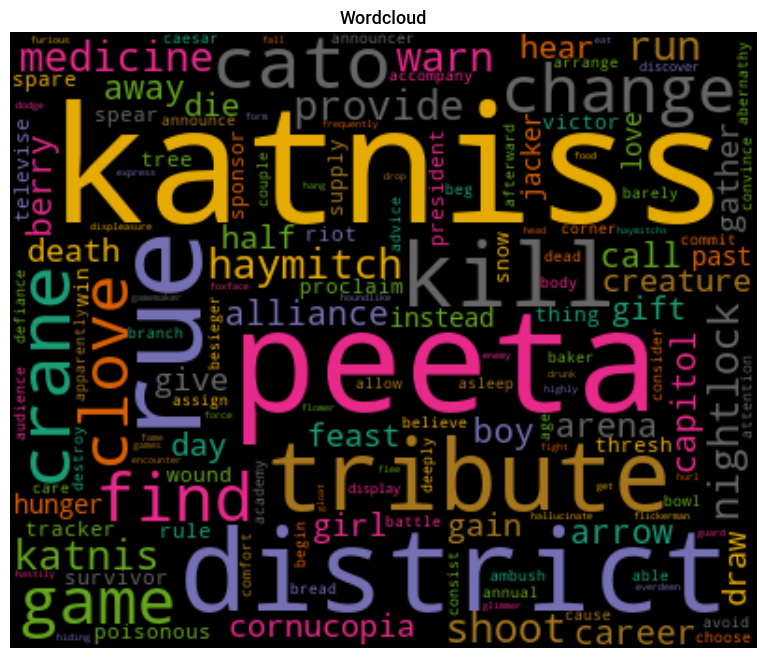

In [79]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text


# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()


generate_wordcloud(df_dtm.iloc[0], 'Wordcloud')